<h1 align=center > Loan Eligibility Analysing and Predicting </h1>

In [241]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [242]:
df = pd.read_csv('data/loan_data_set.csv')
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
574,LP002863,Male,Yes,3+,Graduate,No,6406,0.0,150.0,360.0,1.0,Semiurban,N
547,LP002772,Male,No,0,Graduate,No,2526,1783.0,145.0,360.0,1.0,Rural,Y
427,LP002368,Male,Yes,2,Graduate,No,5935,0.0,133.0,360.0,1.0,Semiurban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
129,LP001465,Male,Yes,0,Graduate,No,6080,2569.0,182.0,360.0,NaN,Rural,N


### Dimension of data

In [243]:
df.shape

(614, 13)

### How Many Null Values?

In [244]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### What type of data is?

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Data Cleaning

In [246]:
df.drop(columns=['Loan_ID'],inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [247]:
sns.set_context('paper', font_scale = 2)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### Separate out Categorical and Numerical Features

In [248]:
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
print("Categorical columns : ", cat_cols)

Categorical columns :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [249]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
print("Numerical columns : ", num_cols)

Numerical columns :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [250]:
num_df = df[num_cols]
num_df.sample(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
582,3166,0.0,36.0,360.0,1.0
505,3510,4416.0,243.0,360.0,1.0
28,1442,0.0,35.0,360.0,1.0
218,5000,0.0,72.0,360.0,0.0
470,3450,2079.0,162.0,360.0,1.0


In [251]:
cat_df = df[cat_cols]
cat_df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
572,Male,Yes,2,Graduate,No,Urban,Y
243,Male,Yes,2,Graduate,Yes,Rural,Y
351,Male,No,0,Graduate,No,Rural,N
374,Female,No,0,Graduate,NaN,Urban,Y
424,Male,Yes,0,Graduate,No,Semiurban,Y


<h1 align=center > Exploratory Data Analysis </h1>

In [252]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 'Yes' if x == 'Y' else 'No')

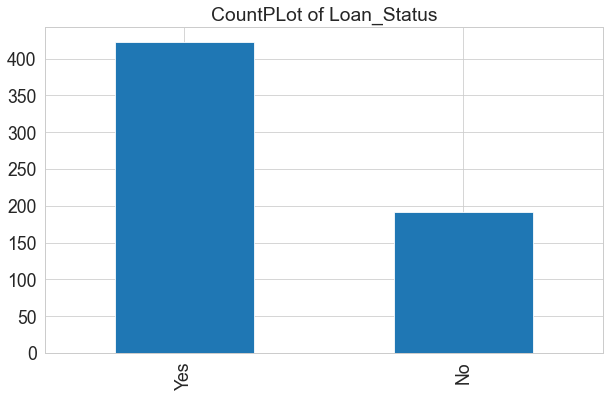

In [253]:
df['Loan_Status'].value_counts().plot(kind='bar')
plt.title('CountPLot of Loan_Status');

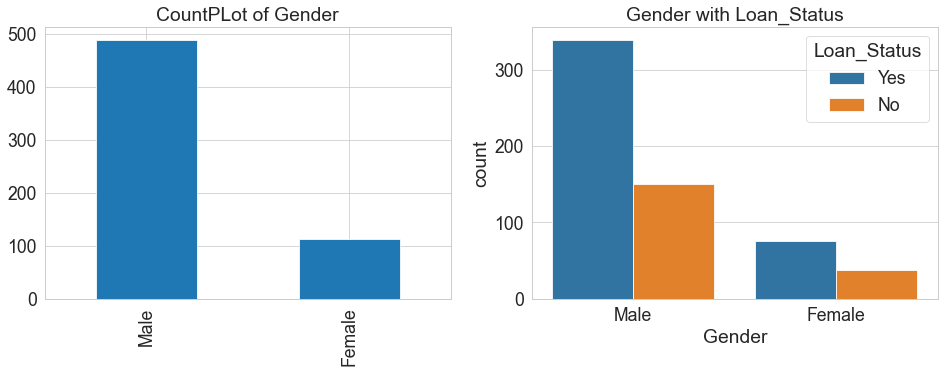

In [254]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Gender'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('CountPLot of Gender')
sns.countplot(x = df['Gender'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Gender with Loan_Status');

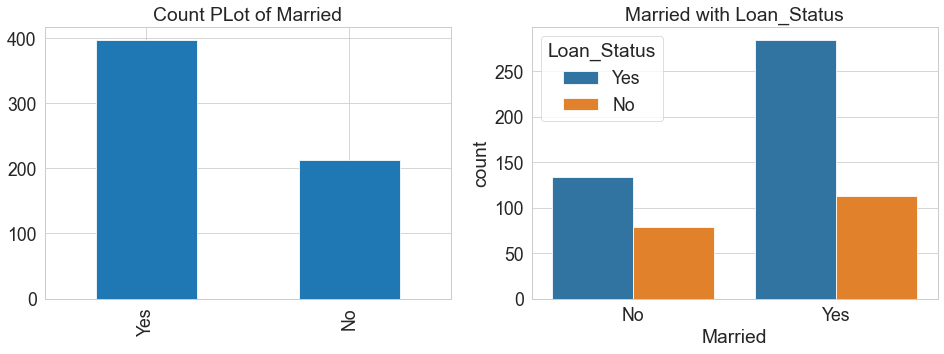

In [255]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Married'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Married')
sns.countplot(x = df['Married'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Married with Loan_Status');

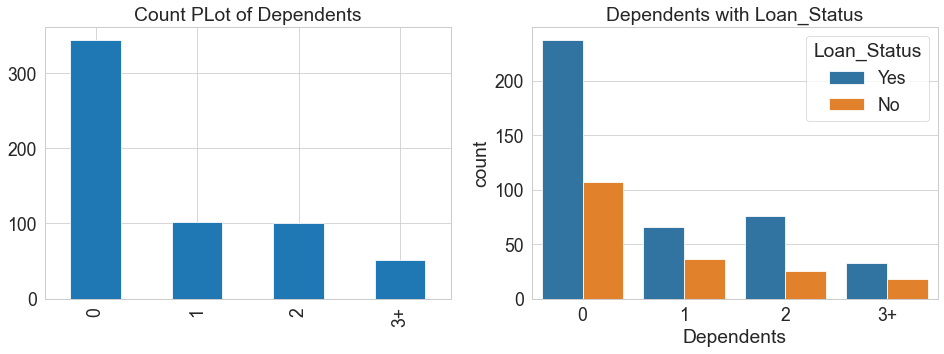

In [256]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Dependents'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Dependents')
sns.countplot(x = df['Dependents'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Dependents with Loan_Status');

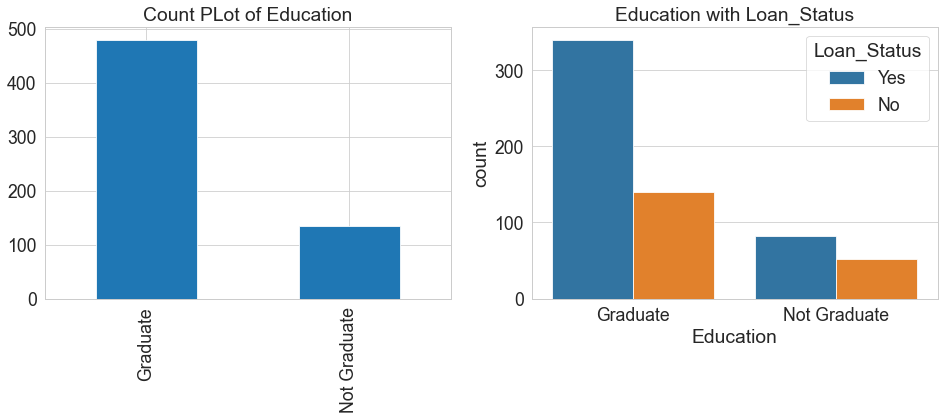

In [257]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Education'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Education')
sns.countplot(x = df['Education'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Education with Loan_Status');

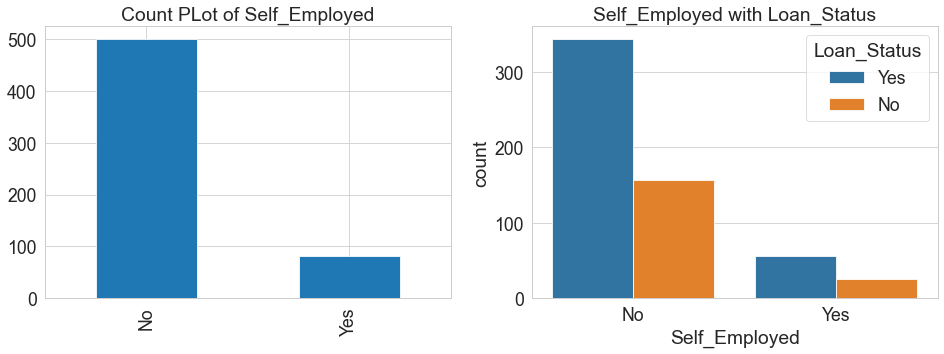

In [258]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Self_Employed'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Self_Employed')
sns.countplot(x = df['Self_Employed'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Self_Employed with Loan_Status');

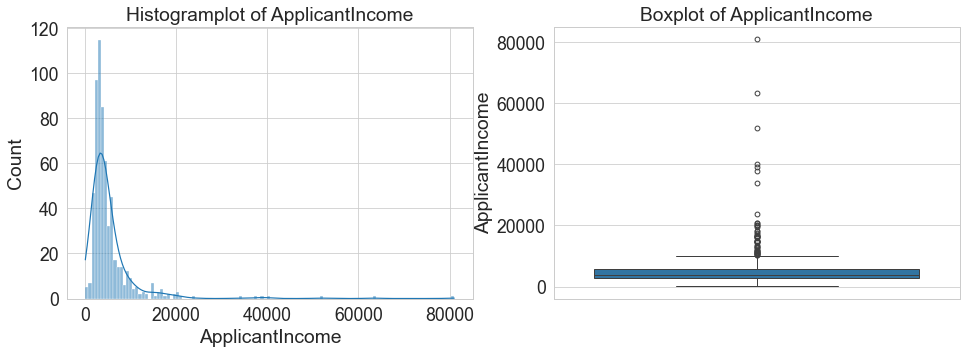

In [259]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['ApplicantIncome'],kde=True,ax=ax1)
ax1.set_title('Histogramplot of ApplicantIncome')
sns.boxplot(df['ApplicantIncome'],ax=ax2)
ax2.set_title('Boxplot of ApplicantIncome');

In [260]:
df['ApplicantIncome'].skew()

6.539513113994625

In [261]:
iqr = df['ApplicantIncome'].quantile(0.75) - df['ApplicantIncome'].quantile(0.25)
upper_limit= df['ApplicantIncome'].quantile(0.75) + iqr *1.5

In [262]:
tmp = df['ApplicantIncome']
df['ApplicantIncome']= np.where(df['ApplicantIncome'] >upper_limit,upper_limit,df['ApplicantIncome'])

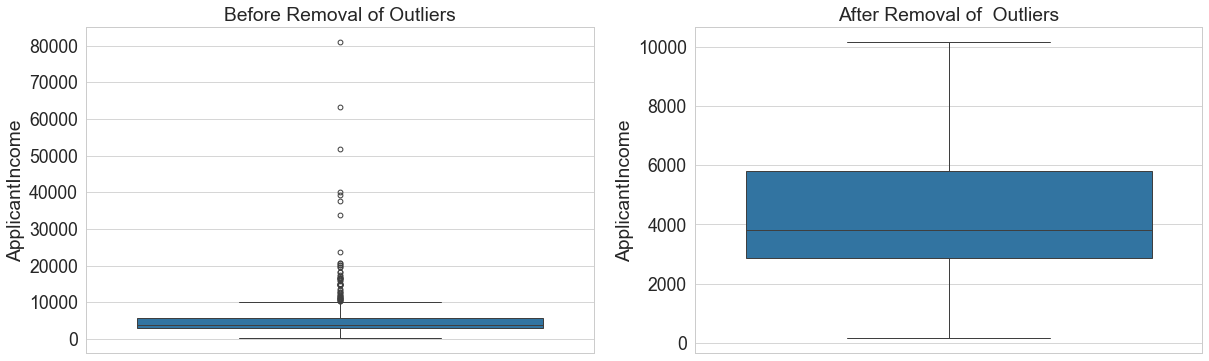

In [263]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
ax1.set_title('Before Removal of Outliers')
sns.boxplot(tmp,ax=ax1);
ax2.set_title('After Removal of  Outliers');
sns.boxplot(df['ApplicantIncome'],ax=ax2);

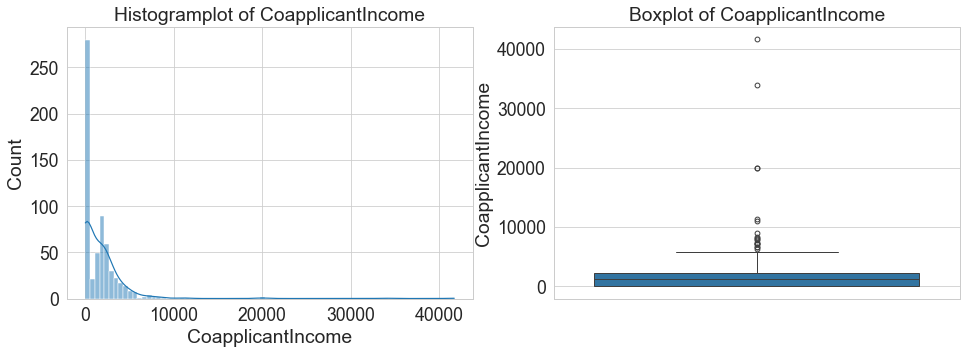

In [264]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['CoapplicantIncome'],kde=True,ax=ax1)
ax1.set_title('Histogramplot of CoapplicantIncome')
sns.boxplot(df['CoapplicantIncome'],ax=ax2)
ax2.set_title('Boxplot of CoapplicantIncome');

In [265]:
df['CoapplicantIncome'].skew()

7.491531216657306

In [266]:
iqr = df['CoapplicantIncome'].quantile(0.75) - df['CoapplicantIncome'].quantile(0.25)
upper_limit= df['CoapplicantIncome'].quantile(0.75) + iqr *1.5

In [267]:
tmp = df['CoapplicantIncome']
df['CoapplicantIncome']= np.where(df['CoapplicantIncome'] >upper_limit,upper_limit,df['CoapplicantIncome'])

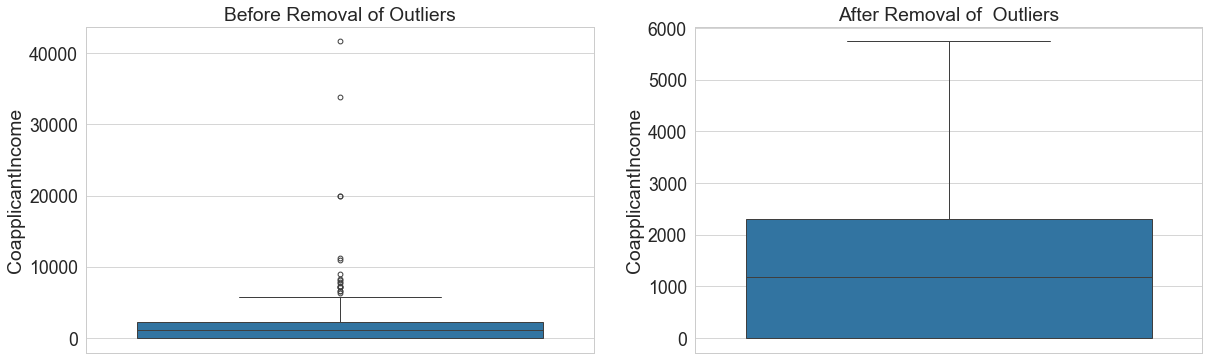

In [268]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
ax1.set_title('Before Removal of Outliers')
sns.boxplot(tmp,ax=ax1);
ax2.set_title('After Removal of  Outliers');
sns.boxplot(df['CoapplicantIncome'],ax=ax2);

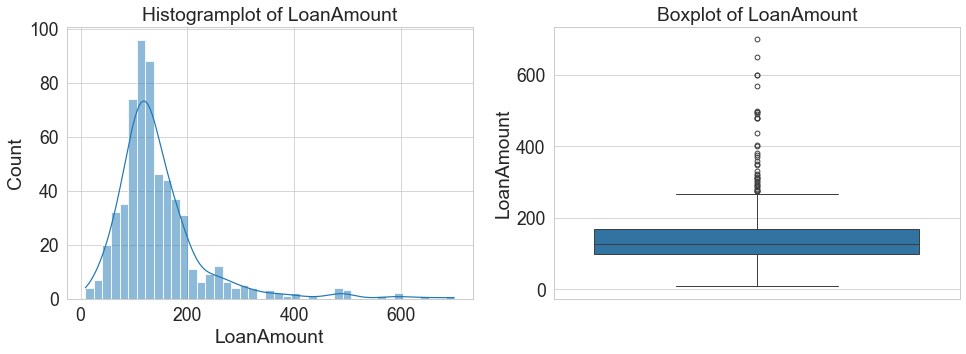

In [269]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['LoanAmount'],kde=True,ax=ax1)
ax1.set_title('Histogramplot of LoanAmount')
sns.boxplot(df['LoanAmount'],ax=ax2)
ax2.set_title('Boxplot of LoanAmount');

In [270]:
df['LoanAmount'].skew()

2.677551679256059

In [271]:
iqr = df['LoanAmount'].quantile(0.75) - df['LoanAmount'].quantile(0.25)
upper_limit= df['LoanAmount'].quantile(0.75) + iqr *1.5

In [272]:
tmp = df['LoanAmount']
df['LoanAmount']= np.where(df['LoanAmount'] >upper_limit,upper_limit,df['LoanAmount'])

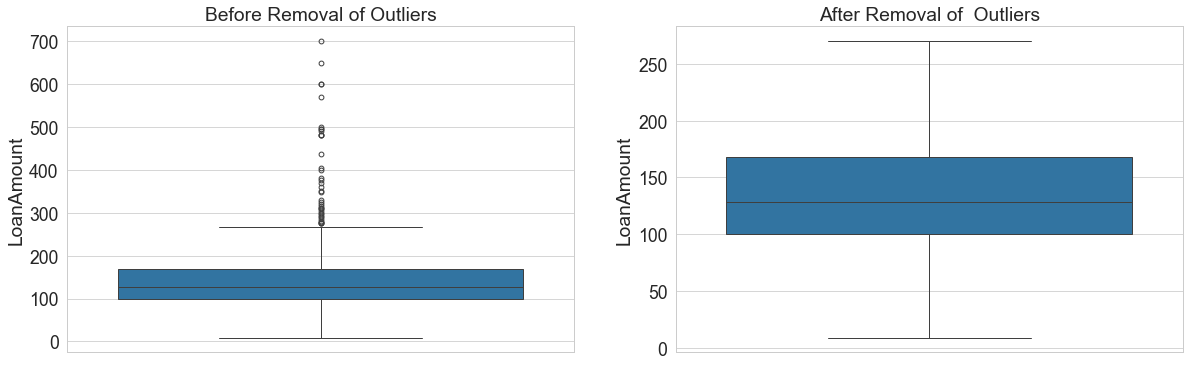

In [273]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
ax1.set_title('Before Removal of Outliers')
sns.boxplot(tmp,ax=ax1);
ax2.set_title('After Removal of  Outliers');
sns.boxplot(df['LoanAmount'],ax=ax2);

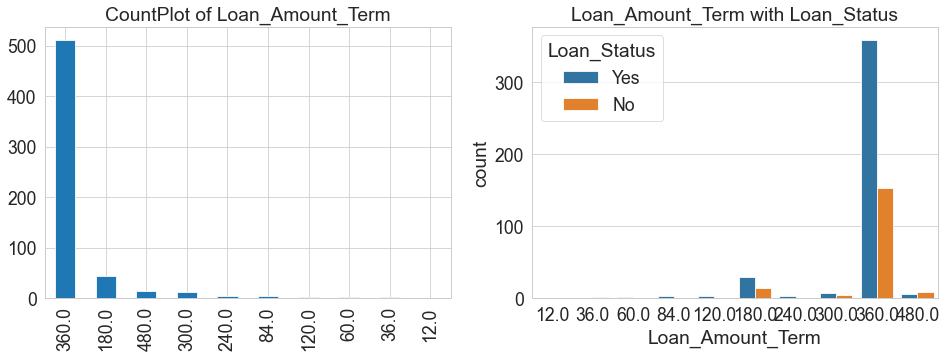

In [274]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Loan_Amount_Term'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('CountPlot of Loan_Amount_Term')
sns.countplot(x = df['Loan_Amount_Term'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Loan_Amount_Term with Loan_Status');

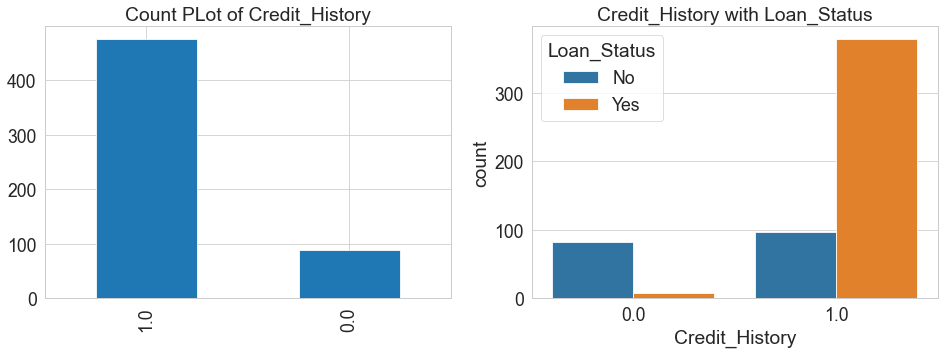

In [275]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Credit_History'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Credit_History')
sns.countplot(x = df['Credit_History'],hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Credit_History with Loan_Status');

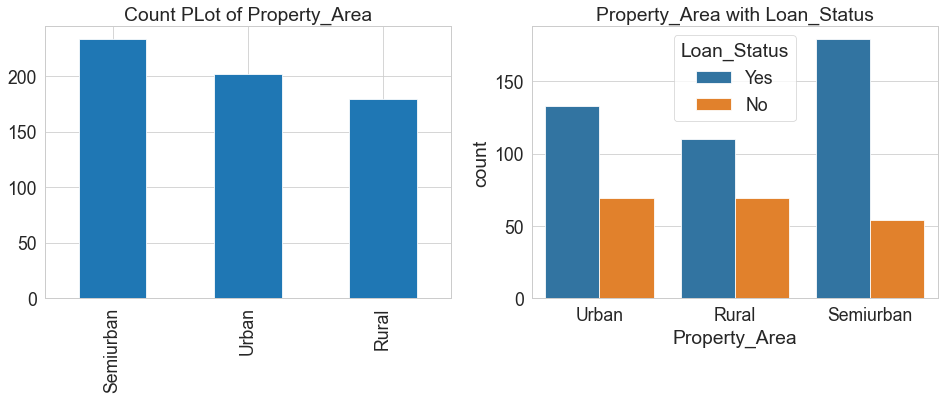

In [276]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Property_Area'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Property_Area')
sns.countplot(x = df['Property_Area'],hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Property_Area with Loan_Status');

### Feature Selection

In [277]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Yes


### chi_test

In [279]:
from scipy.stats import chi2_contingency
catagorical_cols = [0,1,2,3,4,8,9,10]
cols_drop = []
score = []
for i in catagorical_cols:
    
    ct = pd.crosstab(df['Loan_Status'], df[df.columns[i]])
    
    chi2_stats, p_value, dof, expected_frequency = chi2_contingency(ct)

    if p_value > 0.05:
        cols_drop.append(df.columns[i])    
    score.append(p_value)

In [282]:
len(cols_drop)

4

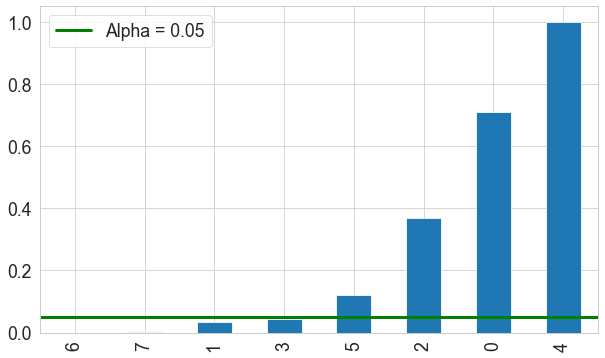

In [280]:
pd.Series(score).sort_values(ascending=True).plot(kind='bar')
plt.axhline(y=0.05, color='g', label='Alpha = 0.05', linewidth=3)
plt.legend()  # Add this line to display the legend
plt.show()

In [281]:
df.drop(columns=cols_drop,inplace=True)
df.sample(5)

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
483,Yes,Graduate,10171.25,0.0,234.0,1.0,Semiurban,Yes
46,Yes,Graduate,5649.00,0.0,44.0,1.0,Urban,Yes
212,Yes,Graduate,7787.00,0.0,240.0,1.0,Urban,Yes
485,Yes,Not Graduate,1958.00,2436.0,131.0,1.0,Rural,Yes
220,Yes,Graduate,2221.00,0.0,60.0,0.0,Urban,No


In [284]:
from scipy.stats import f_oneway

numeric_cols = [2, 3, 4]  # Assuming these are the numerical columns in your DataFrame
cols_drop = []
score = []

for i in numeric_cols:
    # Perform one-way ANOVA
    groups = [df[df['Loan_Status'] == cls][df.columns[i]] for cls in df['Loan_Status'].unique()]
    f_statistic, p_value = f_oneway(*groups)

    if p_value > 0.05:
        cols_drop.append(df.columns[i])

    score.append(p_value)

# Display the results
anova_results = pd.DataFrame({
    'Feature': [df.columns[i] for i in numeric_cols],
    'P-Value': score
})

print(anova_results)


             Feature   P-Value
0    ApplicantIncome  0.991277
1  CoapplicantIncome  0.766979
2         LoanAmount       NaN


In [285]:
len(cols_drop)

2

In [286]:
cols_drop

['ApplicantIncome', 'CoapplicantIncome']

In [191]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 1 if x == 'Yes' else 0)

In [192]:
X = df.drop(columns=['Loan_Status'])
y = df[['Loan_Status']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
'''
from sklearn.pipeline import Pipeline
ohe_cols = [0,1,2,4,10]
ord_cols = [3]
num_cols = [5,6,7]
df.columns
cat_column = [0,1,4,8,9]
num_col = [7]
impute = ColumnTransformer(
    transformers=[
        ('cat', SimpleImputer(strategy='most_frequent'), cat_column),
        ('num', SimpleImputer(strategy='mean'), [7])
    ], remainder='passthrough')

encoding = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False, drop='first'), ohe_cols),
        ('ord', OrdinalEncoder(), ord_cols),
        ('standardization', StandardScaler(), num_cols)
    ], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('imputation', impute),
    ('Enco', encoding)
])
'''

"\nfrom sklearn.pipeline import Pipeline\nohe_cols = [0,1,2,4,10]\nord_cols = [3]\nnum_cols = [5,6,7]\ndf.columns\ncat_column = [0,1,4,8,9]\nnum_col = [7]\nimpute = ColumnTransformer(\n    transformers=[\n        ('cat', SimpleImputer(strategy='most_frequent'), cat_column),\n        ('num', SimpleImputer(strategy='mean'), [7])\n    ], remainder='passthrough')\n\nencoding = ColumnTransformer(\n    transformers=[\n        ('ohe', OneHotEncoder(sparse=False, drop='first'), ohe_cols),\n        ('ord', OrdinalEncoder(), ord_cols),\n        ('standardization', StandardScaler(), num_cols)\n    ], remainder='passthrough')\n\npipeline = Pipeline(steps=[\n    ('imputation', impute),\n    ('Enco', encoding)\n])\n"

In [283]:
df.sample(1)
numeric_cols = [5,6,7]
categorical_cols = [0,1,4,8,9,10] 
ordinal = [2,3]

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
386,No,Not Graduate,2346.0,1600.0,132.0,1.0,Semiurban,Yes


In [194]:
from sklearn.pipeline import Pipeline


numeric_cols = [5,6,7]
categorical_cols = [0,1,4,8,9,10] 
ordinal = [2,3]

numeric_transformer = Pipeline(steps=[
    ('imputer1', SimpleImputer(strategy='mean')),
    ('standardization', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False,drop='first'))
])


ord_encoder = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='most_frequent')),
     ('ord', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('ord',ord_encoder ,ordinal)
    ])

# Creating the pipeline with preprocessing and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [195]:
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [196]:
x_train.shape

(491, 20)

In [197]:
x_test.shape

(123, 20)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11396\1203463256.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train, y_train)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was ex


Logistic Regression Results:
Accuracy: 0.7886


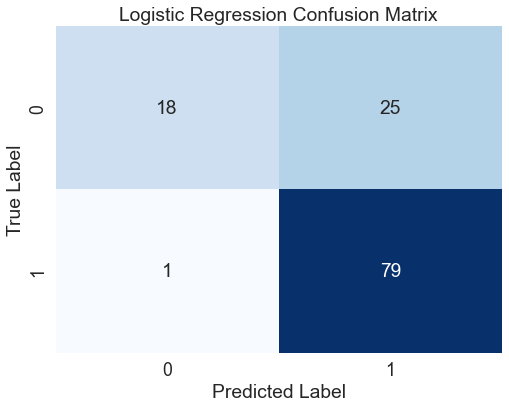

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Decision Tree Results:
Accuracy: 0.6992


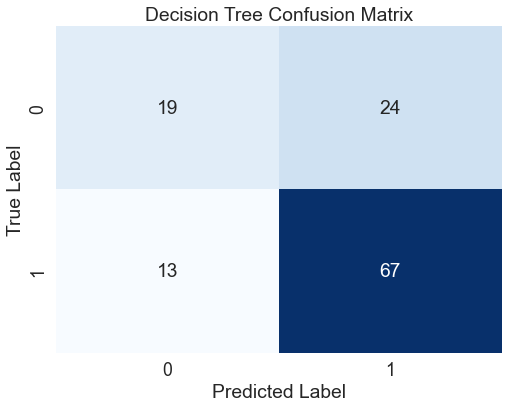

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.44      0.51        43
           1       0.74      0.84      0.78        80

    accuracy                           0.70       123
   macro avg       0.67      0.64      0.65       123
weighted avg       0.69      0.70      0.69       123


Random Forest Results:
Accuracy: 0.7724


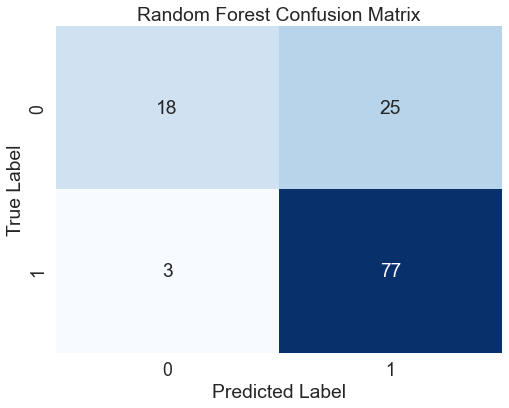

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123


AdaBoost Results:
Accuracy: 0.7886


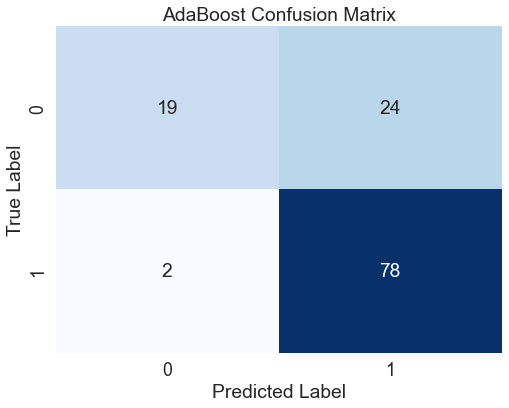

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123


Gradient Boosting Results:
Accuracy: 0.7561


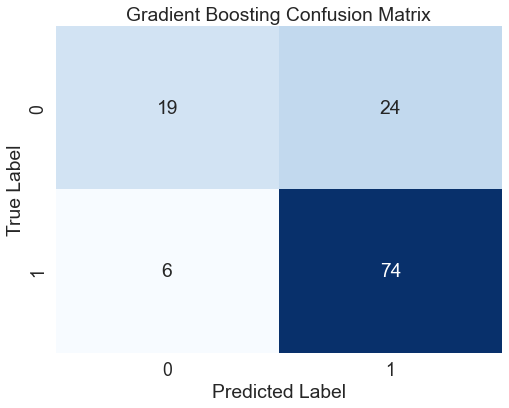

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.44      0.56        43
           1       0.76      0.93      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.68      0.70       123
weighted avg       0.76      0.76      0.74       123


SVM Results:
Accuracy: 0.7967


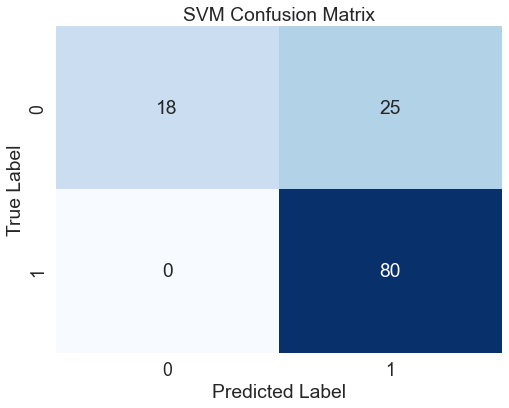

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123


XGBoost Results:
Accuracy: 0.7642


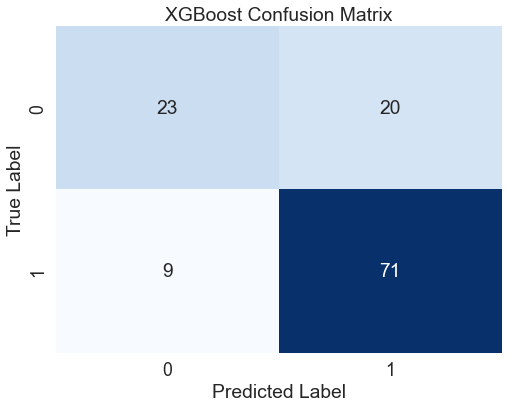

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.53      0.61        43
           1       0.78      0.89      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.71      0.72       123
weighted avg       0.76      0.76      0.75       123



In [198]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb


# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predictions = logreg.predict(x_test)

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
dt_predictions = dt_classifier.predict(x_test)

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
rf_predictions = rf_classifier.predict(x_test)

# AdaBoost
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(x_train, y_train)
adaboost_predictions = adaboost_classifier.predict(x_test)

# Gradient Boosting
gradientboost_classifier = GradientBoostingClassifier()
gradientboost_classifier.fit(x_train, y_train)
gradientboost_predictions = gradientboost_classifier.predict(x_test)

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
svm_predictions = svm_classifier.predict(x_test)

# XGBoost
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)
xgb_predictions = xgb_classifier.predict(x_test)

# Evaluate and visualize models
models = {
    'Logistic Regression': logreg_predictions,
    'Decision Tree': dt_predictions,
    'Random Forest': rf_predictions,
    'AdaBoost': adaboost_predictions,
    'Gradient Boosting': gradientboost_predictions,
    'SVM': svm_predictions,
    'XGBoost': xgb_predictions
}

for model_name, predictions in models.items():
    print(f"\n{model_name} Results:")
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, predictions)
    
    # Visualize Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # Classification Report
    report = classification_report(y_test, predictions)
    print(f"Classification Report:\n{report}")
